In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor

In [76]:
# Define new time index upload the data for CF and Price
start_date = '2000-01-01 00:00:00'
end_date   = '2017-12-31 12:00:00'
time_index = pd.date_range(start=start_date, end=end_date, freq='H')

with open('CF_2000_2017.txt', 'r') as f:
    CF    = np.array(f.read().splitlines(), dtype=float)[:157789]
with open('price_2000_2017.txt', 'r') as f:
    Price = np.array(f.read().splitlines(), dtype=float)

Price     = np.flip(Price)

In [77]:
# Case for load
with open('Consumption.txt', 'r') as f:
    consumption = np.array(f.read().splitlines(), dtype=float)
with open('wind1.txt', 'r') as f:
    wind1       = np.array(f.read().splitlines(), dtype=float)
with open('wind2.txt', 'r') as f:
    wind2       = np.array(f.read().splitlines(), dtype=float)
with open('wind3.txt', 'r') as f:
    wind3       = np.array(f.read().splitlines(), dtype=float)
with open('wind4.txt', 'r') as f:
    wind4       = np.array(f.read().splitlines(), dtype=float)

consumption     = np.flip(consumption)
wind1           = np.flip(wind1)
wind2           = np.flip(wind2)
wind3           = np.flip(wind3)
wind4           = np.flip(wind4)
wind_production = wind1+wind2+wind3+wind4
load            = consumption-wind_production

In [78]:
# Time Index
start_date1  = '2004-12-31 01:00:00'
end_date1    = '2017-12-31 00:00:00'
time_index_n = pd.date_range(start=start_date1, end=end_date1, freq='H')
Price_new    = Price[-113952:]

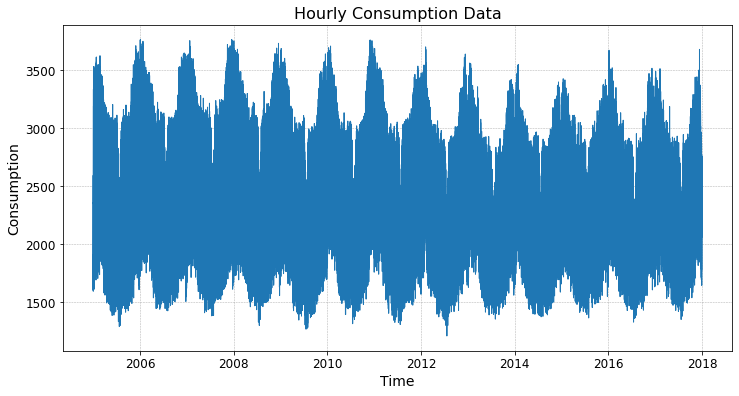

In [79]:
# Plot consumption
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, consumption, linewidth=1)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Consumption', fontsize=14)
plt.title('Hourly Consumption Data', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

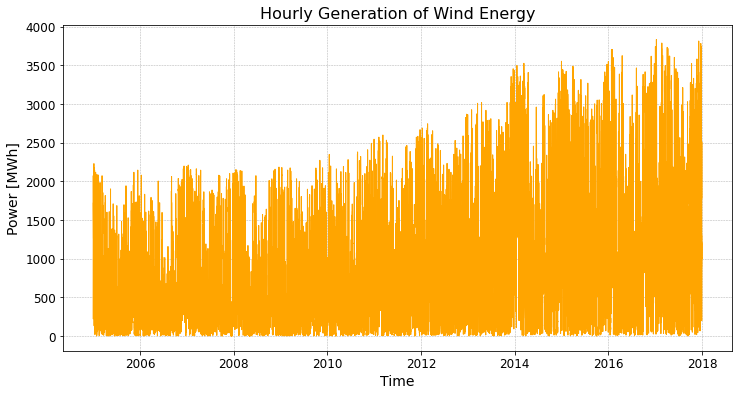

In [80]:
# Plot for Wind Power
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, wind_production, color='orange', linewidth=1)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Power [MWh]', fontsize=14)
plt.title('Hourly Generation of Wind Energy', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

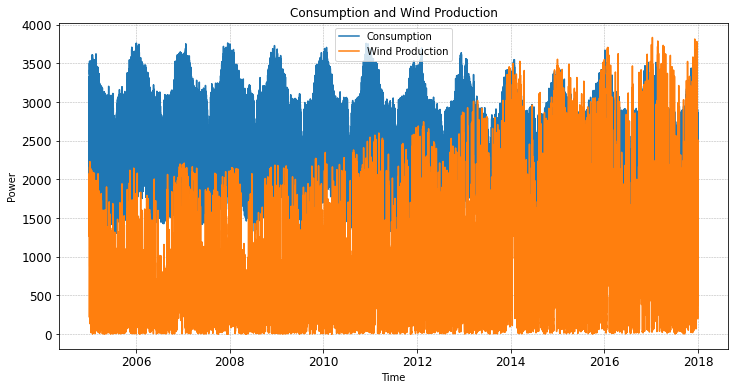

In [81]:
# Plot for Consumption and Wind Power
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, consumption, label='Consumption')
plt.plot(time_index_n, wind_production, label='Wind Production')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Consumption and Wind Production')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

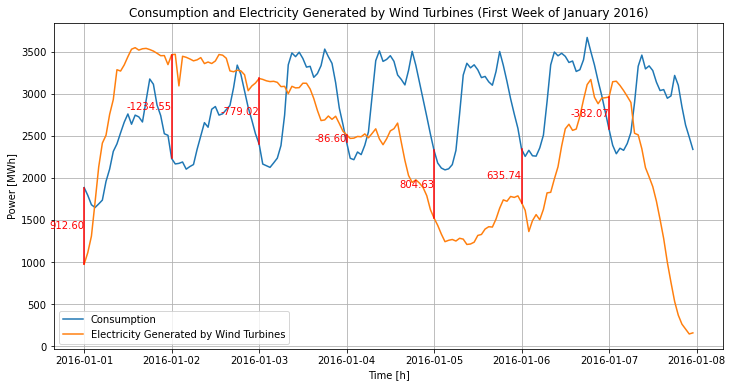

In [82]:
# Define the new time index for one week
start_date2     = '2016-01-01 00:00:00'
end_date2       = '2016-01-07 23:00:00'
time_index_new  = pd.date_range(start=start_date2, end=end_date2, freq='H')
start_index     = np.where(time_index_n == pd.to_datetime(start_date2))[0][0]
end_index       = np.where(time_index_n == pd.to_datetime(end_date2))[0][0]
consumption     = consumption[start_index:end_index+1]
wind_production = wind_production[start_index:end_index+1]

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(time_index_new, consumption, label='Consumption')
plt.plot(time_index_new, wind_production, label='Electricity Generated by Wind Turbines')
consumption_first_hour     = consumption[::24]
wind_production_first_hour = wind_production[::24]
difference                 = consumption_first_hour - wind_production_first_hour

for i in range(len(difference)):
    x = time_index_new[i*24]
    y_cons = consumption_first_hour[i]
    y_wind = wind_production_first_hour[i]
    plt.plot([x, x], [y_cons, y_wind], color='red')
    plt.text(x, (y_cons + y_wind) / 2, f'{difference[i]:.2f}', color='red',
             verticalalignment='center', horizontalalignment='right')

plt.xlabel('Time [h]')
plt.ylabel('Power [MWh]')
plt.title('Consumption and Electricity Generated by Wind Turbines (First Week of January 2016)')
plt.legend()
plt.grid(True)
plt.show()

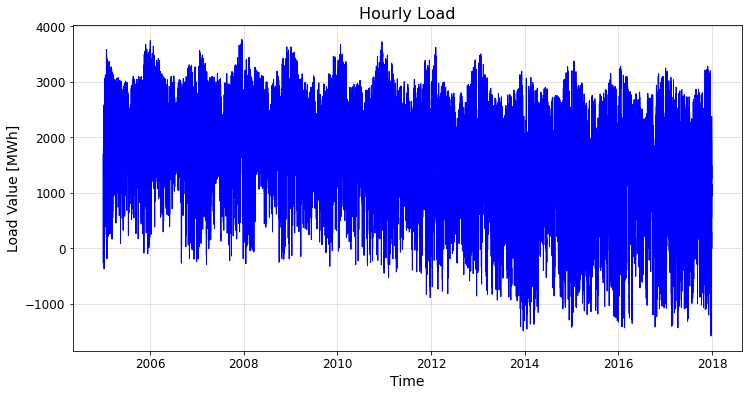

In [83]:
# Plot Load
plt.figure(figsize=(12, 6))
plt.plot(time_index_n, load, color='b', linewidth=1)
plt.title('Hourly Load', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Load Value [MWh]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

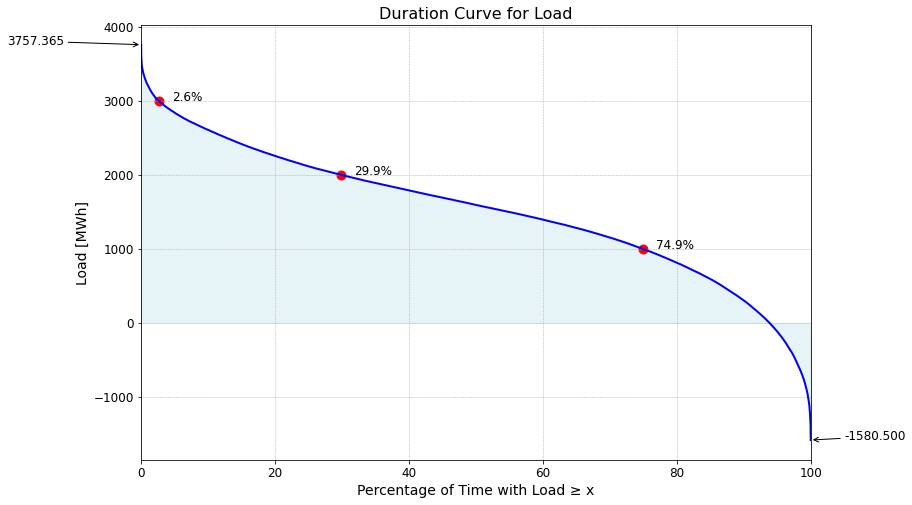

In [84]:
# Duration curve for Load
sorted_load  = sorted(load,reverse=False)
percentage_l = 100 * (1 - np.arange(1, len(sorted_load) + 1) / (len(sorted_load) + 1)) 

# Plot
plt.figure(figsize=(12, 8))
plt.plot(percentage_l, sorted_load, color='blue', linewidth=2)
plt.title('Duration Curve for Load', fontsize=16)
plt.xlabel('Percentage of Time with Load ≥ x', fontsize=14)
plt.ylabel('Load [MWh]', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([0, 100])
plt.fill_between(percentage_l, sorted_load, color='lightblue', alpha=0.3)

# Add dots and annotations
plt.annotate(f'{sorted_load[0]:.3f}', xy=(percentage_l[0], sorted_load[0]), xytext=(percentage_l[0]+5, sorted_load[0]+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate(f'{sorted_load[-1]:.3f}', xy=(percentage_l[-1], sorted_load[-1]), xytext=(percentage_l[-1]-20, sorted_load[-1]-0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

load_values = [3000, 2000, 1000]
for load in load_values:
    index = next(i for i, val in enumerate(sorted_load) if val >= load)
    plt.scatter(percentage_l[index], sorted_load[index], color='red', s=80)
    plt.annotate(f'{percentage_l[index]:.1f}%', xy=(percentage_l[index], sorted_load[index]), xytext=(percentage_l[index] + 2, sorted_load[index] - 0.1), fontsize=12)

plt.show()

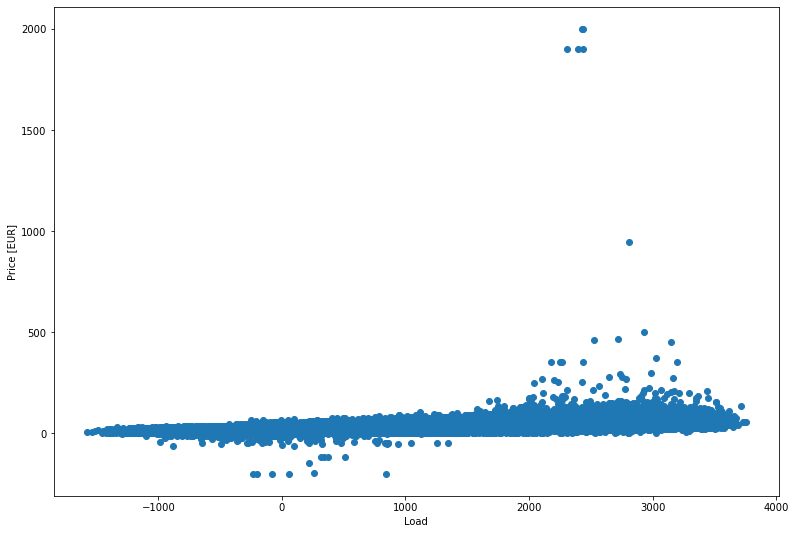

In [85]:
# Scatetr plot Load and Price 
with open('Consumption.txt', 'r') as f:
    consumption = np.array(f.read().splitlines(), dtype=float)
with open('wind1.txt', 'r') as f:
    wind1       = np.array(f.read().splitlines(), dtype=float)
with open('wind2.txt', 'r') as f:
    wind2       = np.array(f.read().splitlines(), dtype=float)
with open('wind3.txt', 'r') as f:
    wind3       = np.array(f.read().splitlines(), dtype=float)
with open('wind4.txt', 'r') as f:
    wind4       = np.array(f.read().splitlines(), dtype=float)

consumption     = np.flip(consumption)
wind1           = np.flip(wind1)
wind2           = np.flip(wind2)
wind3           = np.flip(wind3)
wind4           = np.flip(wind4)
wind_production = wind1+wind2+wind3+wind4
load            = consumption-wind_production

plt.figure(figsize=(13, 9))
plt.scatter(load,Price_new)
plt.xlabel('Load')
plt.ylabel('Price [EUR]')
plt.show()

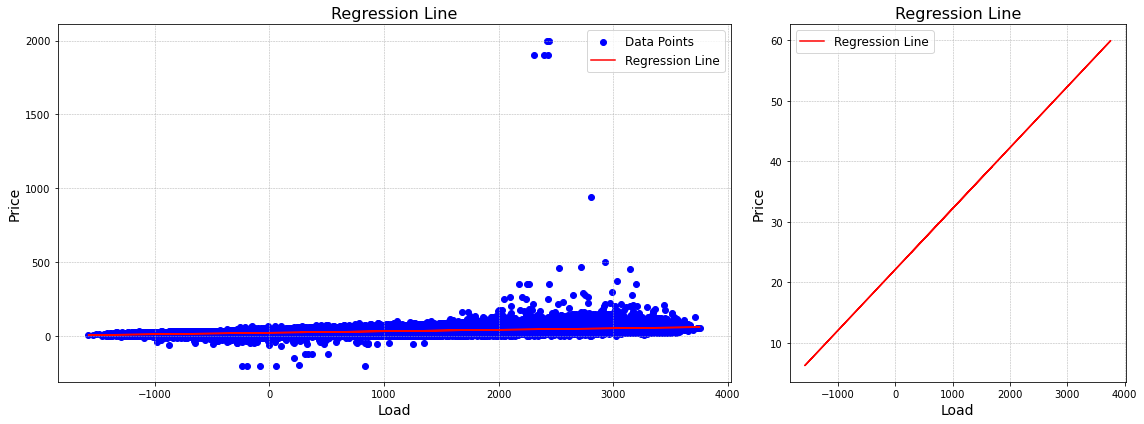

In [86]:
# Simple Regression for Load and Price
load = load.reshape(-1, 1)

# Create a regression model
regression_model = LinearRegression()
regression_model.fit(load, Price_new)
regression_line = regression_model.predict(load)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Left subplot: Data points and regression line
axs[0].scatter(load, Price_new, color='b', label='Data Points')
axs[0].plot(load, regression_line, color='r', label='Regression Line')
axs[0].set_xlabel('Load', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].set_title('Regression Line', fontsize=16)
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Right subplot: Regression line only
axs[1].plot(load, regression_line, color='r', label='Regression Line')
axs[1].set_xlabel('Load', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].set_title('Regression Line', fontsize=16)
axs[1].grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

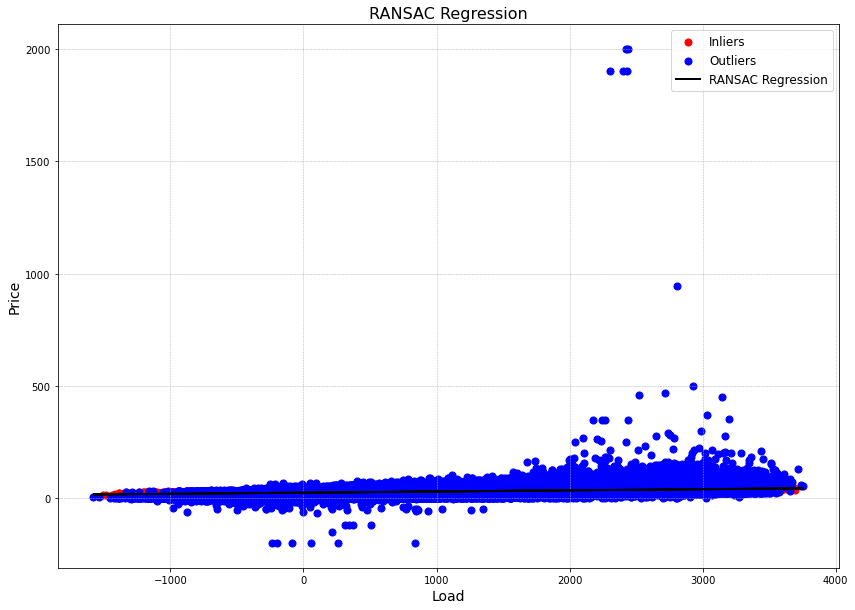

In [87]:
# Robust Regression for laod and price
load = load.flatten()

# Create RANSACRegressor model
ransac_cf = RANSACRegressor()
ransac_cf.fit(load.reshape(-1, 1), Price_new)
inlier_mask  = ransac_cf.inlier_mask_
outlier_mask = ~inlier_mask

plt.figure(figsize=(14, 10))
plt.scatter(load[inlier_mask], Price_new[inlier_mask], color='red', label='Inliers', s=50)
plt.scatter(load[outlier_mask], Price_new[outlier_mask], color='blue', label='Outliers', s=50)
plt.plot(load, ransac_cf.predict(load.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
plt.xlabel('Load', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('RANSAC Regression', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

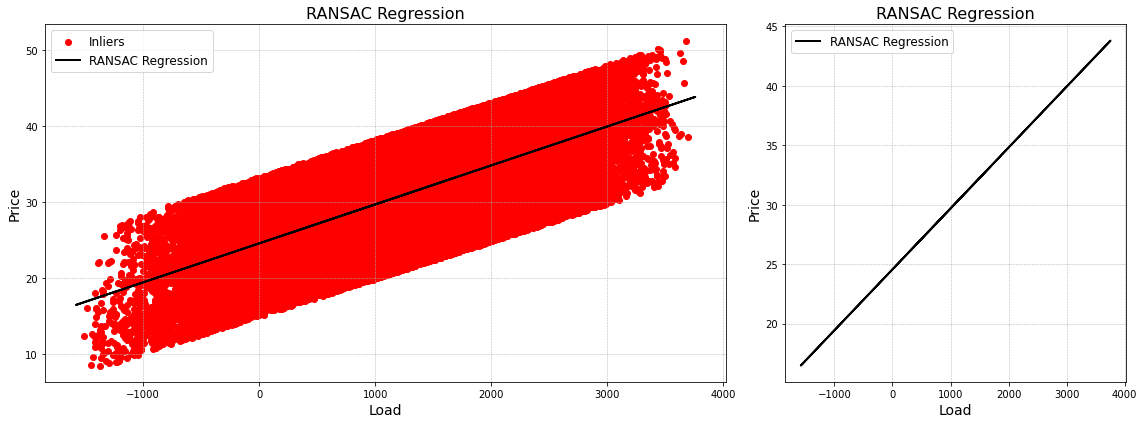

In [88]:
# Robust Regression for laod and price
fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})

# Robust Regression just with inliers
axs[0].scatter(load[inlier_mask], Price_new[inlier_mask], color='red', label='Inliers')
axs[0].plot(load, ransac_cf.predict(load.reshape(-1, 1)), color='black', linewidth=2, label='RANSAC Regression')
axs[0].set_title('RANSAC Regression', fontsize=16)
axs[0].set_xlabel('Load', fontsize=14)
axs[0].set_ylabel('Price', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Plot the RANSAC regression line
regression_line = ransac_cf.predict(load.reshape(-1, 1))

axs[1].plot(load, regression_line, color='black', linewidth=2, label='RANSAC Regression')
axs[1].set_title('RANSAC Regression', fontsize=16)
axs[1].set_xlabel('Load', fontsize=14)
axs[1].set_ylabel('Price', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()